In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from gym.envs.registration import register
import readchar
from IPython.display import clear_output
%matplotlib inline

# Stochastic World 

* <strong>In deterministic models</strong> the output of the model is fully detemines by the parameter values and the initial conditions.
* <strong>Stochastic models</strong> possess some inherent randomness.
  - The same set of parameter values and initial conditions will lead to an ensemble of different outputs.

### Deterministic World

In [2]:
register(
        id='FrozenLake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name' : '4x4',
                       'is_slippery' : False} 
)

In [3]:
ditermenv = gym.make('FrozenLake-v3')

[2017-02-23 17:42:06,263] Making new env: FrozenLake-v3


In [4]:
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

In [5]:
VALID = ['a','s','d','w']

In [6]:
_ = ditermenv.reset()
ditermenv.render()

while True:
    
    key = input()
    if key not in VALID:
        print("Game aborted!")
        break
    
    action = VALID.index(key)
    state, reward, done, info = ditermenv.step(action)
    clear_output()
    ditermenv.render()
    print("State: ", state, "Action: ", action, "Reward: ",reward,"Info: ",info)
    
    if done:
        print("Finished with reward", reward)
        break

SFFF
FHFH
FFFH
HFFG
  (Right)
State:  15 Action:  2 Reward:  1.0 Info:  {'prob': 1.0}
Finished with reward 1.0


### Stochastic World 

In [7]:
stocenv = gym.make('FrozenLake-v0')

[2017-02-23 17:43:06,733] Making new env: FrozenLake-v0


In [9]:
_ = stocenv.reset()
stocenv.render()

while True:
    
    key = input()
    if key not in VALID:
        print("Game aborted!")
        break
    
    action = VALID.index(key)
    state, reward, done, info = stocenv.step(action)
    clear_output()
    stocenv.render()
    print("State: ", state, "Action: ", action, "Reward: ",reward,"Info: ",info)
    
    if done:
        print("Finished with reward", reward)
        break

SFFF
FHFH
FFFH
HFFG
  (Right)
State:  12 Action:  2 Reward:  0.0 Info:  {'prob': 0.3333333333333333}
Finished with reward 0.0


### Diterministic에서 하던대로 하면 랜덤보다 안나온다..(alpha 고려  x) 

In [10]:
env = gym.make('FrozenLake-v0')

[2017-02-23 17:45:39,240] Making new env: FrozenLake-v0


In [11]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
num_episodes = 2000
dis = .99
rList = [] # create lists to contain total rewards and steps per episode
EGREEDY = True # True if e-greedy , False if add random_noise

In [15]:
for i_episode in range(num_episodes):
    state = env.reset()
    rAll = 0 # 모든 리워드?
    done = False
    e = 1. / ((i_episode//100)+1)
    
    while not done: # 한판 끝날 때 까지 해봐서 Q-value를 업데이트를 해나간다
        
        if EGREEDY:
            # e-greedy
            if np.random.rand(1) < e:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
        else:
            # add random_noise
            action =np.argmax(Q[state] + np.random.rand(1,env.action_space.n)/(i_episode+1))
        
        new_state, reward, done, _ = env.step(action)
        Q[state,action] = reward + dis*np.max(Q[new_state])
        
        rAll += reward
        state = new_state
    rList.append(rAll)

In [16]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

Success rate: 0.039
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.078651    0.          0.07786449  0.07786449]
 [ 0.          0.          0.          0.07708584]
 [ 0.          0.          0.          0.08024793]
 [ 0.          0.          0.          0.08353973]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.91351725  0.        ]
 [ 0.          0.93206535  0.93206535  0.96059601]
 [ 0.          0.          0.          0.        ]]


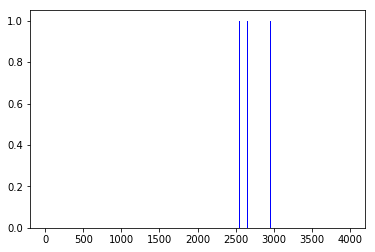

In [17]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

# Solution? 

- Listen to Q(s') (just a little bit)
- Update Q(s) little bit (learning rate) <hr>
Like our Life mentors
- Don't just listen and follow one mentor
- Need to listen from many mentors

# Learning incrementally 

Target Q의 0.1퍼센트만 반영하여 학습해나가겠다. (멘토의 경험도 다 옳은 것은 아니니 참고만 하겠다)

Learning rate, $\alpha$


$Q(s,a)$ <- $Q(s,a) + \alpha [r + \gamma max_{a'} Q(s',a') - Q(s,a)]$


In [43]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
num_episodes = 3000
learning_rate = 0.85
rList = [] # create lists to contain total rewards and steps per episode

In [46]:
for i_episode in range(num_episodes):
    state = env.reset()
    rAll = 0 # 모든 리워드?
    done = False
    e = 1. / ((i_episode//100)+1)
    
    while not done: # 한판 끝날 때 까지 해봐서 Q-value를 업데이트를 해나간다
        
        if EGREEDY:
            # e-greedy
            if np.random.rand(1) < e:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
        else:
            # add random_noise
            action =np.argmax(Q[state] + np.random.rand(1,env.action_space.n)/(i_episode+1))
        
        new_state, reward, done, _ = env.step(action)
        target = reward + dis*np.max(Q[new_state])
#         Q[state,action] = (1-learning_rate)*Q[state,action] + \
#                                         learning_rate*(reward + dis*np.max(Q[new_state]))
        Q[state,action] += learning_rate*(target - Q[state,action])
        rAll += reward
        state = new_state
    rList.append(rAll)

In [47]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

Success rate: 0.4256666666666667
Final Q-Table Values
LEFT DOWN RIGHT UP
[[  2.12726312e-01   2.85276624e-01   2.86245818e-01   2.95453269e-01]
 [  5.33471279e-02   2.34888956e-01   5.43489407e-02   2.71244922e-01]
 [  2.17584569e-01   2.48150400e-01   8.71534988e-02   2.69412456e-01]
 [  2.55254472e-01   4.71645156e-02   1.14060021e-03   2.69435634e-01]
 [  2.93543487e-01   9.91617998e-02   2.00361587e-03   2.79806624e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.15314742e-02   2.13267890e-06   8.95357415e-03   2.69016716e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  9.80074478e-02   4.59129357e-02   1.12185473e-01   3.51655530e-01]
 [  7.01979014e-02   4.37530754e-01   3.50100705e-04   8.04143134e-02]
 [  1.98596443e-01   6.70807885e-05   6.73161242e-03   1.58619505e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  

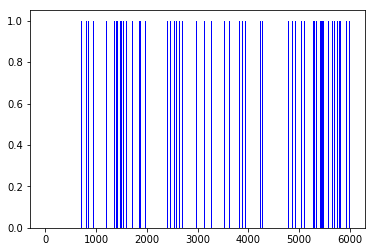

In [48]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()